In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('naver.csv')
df

,id,title,author,genre,description,rating,date,completed,age,free,link
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...
...,...,...,...,...,...,...,...,...,...,...,...
2095,675393,[드라마원작] 한번 더 해요,미티 / 구구,"스토리, 드라마",결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,9.91,2018.03.22,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2096,687921,[드라마원작] 아일랜드 2부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,9.97,2018.02.14,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2097,677536,[드라마원작] 내 ID는 ...,기맹기,"스토리, 로맨스","못생긴 얼굴에서 미인으로 새롭게 태어난 그녀, 강미래! 그런데... 어디서 본 듯 한데?",9.83,2017.12.29,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2098,678500,[드라마원작] 아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2100 non-null   int64  
 1   title        2100 non-null   object 
 2   author       2100 non-null   object 
 3   genre        2100 non-null   object 
 4   description  2100 non-null   object 
 5   rating       2100 non-null   float64
 6   date         2100 non-null   object 
 7   completed    2100 non-null   bool   
 8   age          1998 non-null   object 
 9   free         2100 non-null   bool   
 10  link         2100 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 151.9+ KB


In [4]:
df_sort = df.sort_values(by='rating', ascending=False)

In [5]:
df_sort

,id,title,author,genre,description,rating,date,completed,age,free,link
952,797731,순정빌런,세윤,"스토리, 로맨스",특수능력을 가진 범죄자를 상대하기 위한 특수경찰이 존재하는 세계. 평화로운 나날을 ...,9.99,2022.12.28 22:50,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...
73,693431,계룡선녀전,돌배,"스토리, 드라마","고려, 조선시대를 거쳐 바리스타가 된 계룡산 선녀님(女, 699세)환생한 서방님과 ...",9.98,2018.03.14 23:08,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...
1097,710750,악마와 계약연애,장진 / 움비,"스토리, 로맨스",아무것도 원하지 않는 인간 한나.갑자기 나타난 악마와 영혼을 걸고 계약을 하게 되다?!,9.98,2020.11.16 23:25,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
120,687137,구름의 이동속도,김이랑,"에피소드, 드라마",흙수저 탈출만이 유일한 목표?홍상완의 뜻대로 안풀리는 고교생활 이야기,9.98,2018.01.26 23:21,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...
1366,749456,웰캄투실버라이프,솔녀,"에피소드, 일상","보고만 있어도 힐링되는 할아버지, 할머니와의 일상! 라떼는 말이야~ 금지!! 황혼 ...",9.98,2021.10.08 22:58,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
...,...,...,...,...,...,...,...,...,...,...,...
427,728061,돼지만화,돼지작가,"에피소드, 일상",주의 : 돼지들만 보시오! 맛있는 걸 좋아하는 동네 돼지들의 일상!,4.56,2022.06.30 16:30,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
94,686911,공감.jpg,임총,"에피소드, 개그","""이거 나만 그런거 아니지?""응, 너만 그런거 아니야. 반박불가 공감이 밀려온다.",4.45,2017.10.27 23:23,True,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=6...
358,762035,달의 요람,이정선,"스토리, 드라마","낯선 나라 유안에 끌려온 멸망국의 포로, 월영.황궁에서 만난 건 가국을 멸망시킨 유...",4.02,2022.12.28 22:54,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...
168,793863,그녀의 육하원칙,일삼구,"스토리, 스릴러","같은 반 남학생 '주하원'을 주인공으로 소설을 쓰는 '정민'.그의 말투, 행동, 표...",4.01,2022.10.18 22:57,True,15세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...


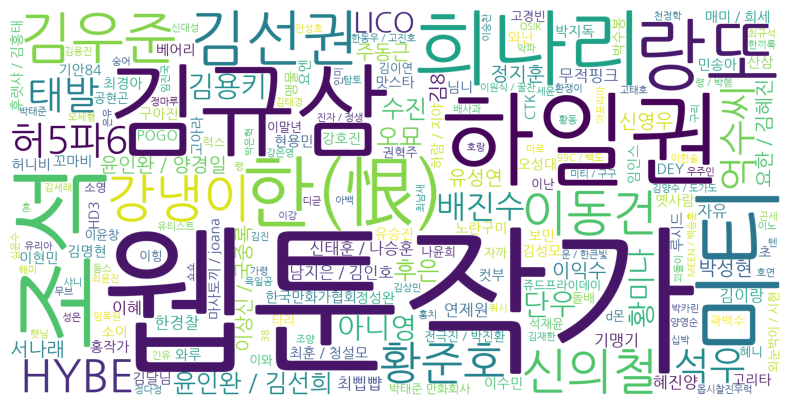

In [93]:
font_path = '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc'

wordcloud = WordCloud(font_path=font_path, width=2000, height=1000, background_color='white').generate_from_frequencies(df_sort['author'].value_counts())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

작가별로 어떤 작가가 제일 많이 웹툰을 그렸는지 확인해보면</br>
웹툰작가들이 협업한 웹툰이 가장 많았고 그외에</br>
김규삼 , 조석 , 하일권, 희나리 한, 작가들이 많이 그린걸 한 눈에 볼 수 있다.

In [7]:
completed_cnt = df.groupby('completed').id.nunique()
completed_cnt

completed
False     694
True     1406
Name: id, dtype: int64

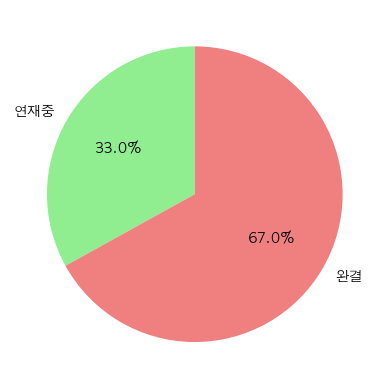

In [11]:
plt.rcParams['font.family'] = 'AppleGothic'
labels=['연재중', '완결']
colors = ['lightgreen', 'lightcoral'] 
plt.pie(completed_cnt, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

plt.show()

2022년 12월 31일 기준으로 연재중인 웹툰은 33%이고 완결된 웹툰은 67%이다.

In [90]:
df_Drama = df_sort[df_sort['title'].str.contains('드라마원작')]
df_Drama['title'] = df_Drama['title'].str.replace('[드라마원작]', '')

df_Movie = df_sort[df_sort['title'].isin(['신과함께', '여중생A', '아이들은 즐겁다'])]

df_Drama_Movie = pd.concat([df_Drama, df_Movie])
df_Drama_Movie = df_Drama_Movie.sort_values(by='rating', ascending=False)
df_Drama_Movie

/var/folders/6w/qxzgw9s50715lgz4jjb5bzcr0000gn/T/ipykernel_1201/3675218329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Drama['title'] = df_Drama['title'].str.replace('[드라마원작]', '')


,id,title,author,genre,description,rating,date,completed,age,free,link
2092,720121,치즈인더트랩,순끼,"스토리, 로맨스","평범한 여대생 홍설, 그리고 어딘가 수상한 선배 유정.미묘한 관계의 이들이 펼쳐나가...",9.98,2019.12.20,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
2094,697679,쌉니다 천리...,김규삼,"스토리, 개그","""고객은 왕이 아니다, 직원이 왕이다!""병맛 드라마를 뛰어넘는 미친 상상력의 원작 웹툰",9.98,2018.06.21,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...
1006,697685,신과함께,주호민,"스토리, 판타지",나쁘지도 착하지도 않은 평범한 남자 김자홍이저승에서 49일 동안 일곱 번의 재판을 ...,9.98,2019.01.16 23:01,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...
1199,647946,여중생A,허5파6,"스토리, 드라마",게임에 빠져 사는 중학생 장미래.생각 많고 내향적인 그녀의 현실 속 학교생활.,9.98,2017.06.25 23:19,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...
2096,687921,아일랜드 2부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,9.97,2018.02.14,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2091,701081,스위트홈,김칸비 / 황영찬,"스토리, 스릴러","절망의 세상을 비관하고 스스로를 고립시킨 한 소년,하지만 이제 소년은 밖으로 나가고...",9.97,2020.07.02,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
2093,718018,알고있지만,정서,"스토리, 로맨스","""넌 내가 나비라는걸 알고 있잖아.""알면서도 빠지고 싶은 사랑<투명한 동거> 정서 ...",9.97,2019.07.17,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
2087,699415,간 떨어지는...,나,"스토리, 로맨스",인간이 되고자 900년간 노력해왔지만 불의의 사고로 한 여대생에게 여우구슬을 빼앗...,9.97,2021.02.03,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...
2098,678500,아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
1075,570502,아이들은 즐겁다,허5파6,"스토리, 드라마",흐릿하지만 섬세했던 유년기담담한 아이들의 이야기.,9.96,2014.05.26 23:11,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=5...


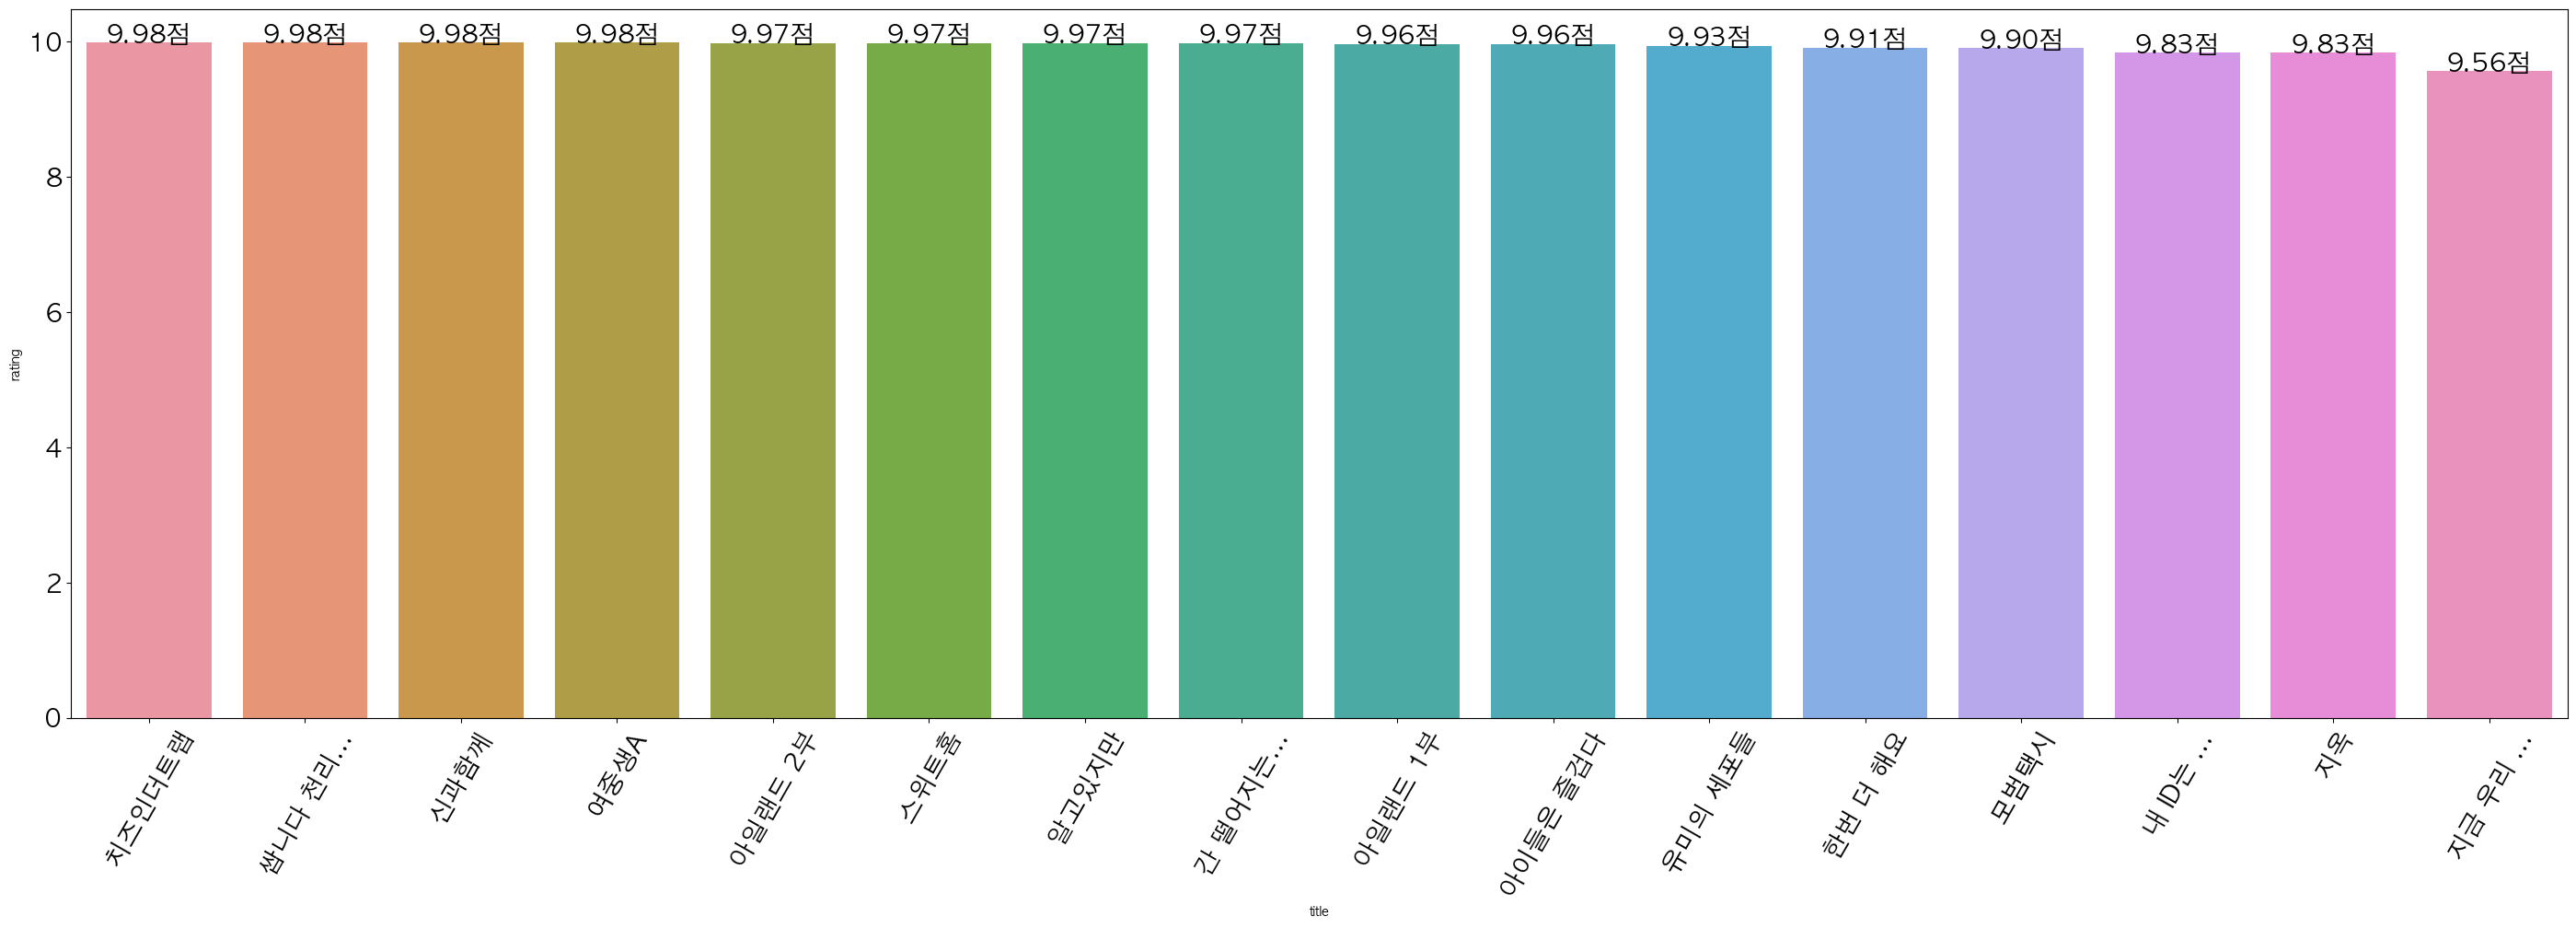

In [91]:
plt.figure(figsize=(35, 10))
Drama_Movie_bar = sns.barplot(data=df_Drama_Movie, x='title', y='rating')

for p in Drama_Movie_bar.patches:
    Drama_Movie_bar.text(p.get_x() + p.get_width()/2,
                    p.get_y() + p.get_height(),
                    f'{p.get_height():.2f}점',
                    ha='center',
                    fontsize=20
                   )
    
plt.yticks(fontsize=20)    
plt.xticks(rotation=60)
plt.xticks(fontsize=20)
plt.show()

모든 웹툰중에 가장높은 9.99점인 웹툰 한개를 제외하고 그다음으로 높은 점수인 9.98점이 4개나 있고 가장 낮은 점수는 9.56점이다.</br>
대체로 높은 평점을 가진 웹툰들이 영화나 드라마화 되는걸 볼 수 있다.

In [63]:
df_My_author = df_sort[df_sort['author'].isin(['가스파드', '조석', '정연', '기안84', '이말년'])]
df_My_author

,id,title,author,genre,description,rating,date,completed,age,free,link
887,697680,선천적 얼간이들,가스파드,"에피소드, 개그",뭘해도 안되는 얼간이 신인류가 떴다!낙천적 우유부단 가스파드와말초적 친구들의 좌충우...,9.98,2018.02.25 23:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...
1515,637931,전자오락수호대,가스파드,"스토리, 판타지",아무도 모르게 게임을 굴리는 비밀의 일꾼들.최고 요원 패치의 게임 조난 굴곡사!,9.97,2021.05.12 23:11,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...
1677,736744,캐슬,정연,"스토리, 액션","복수를 위해 칼을 갈아온 특급 킬러 '김신',뒷세계 '절대권력'과의 목숨 건 한판 승부!",9.97,2022.03.15 22:58,True,15세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...
1885,733047,행성인간,조석,"스토리, 스릴러",내가 어떤 존재들의 행성이라면?조석 작가가 그리는 신개념 스릴러,9.96,2021.07.24 23:04,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
611,679544,문유,조석,"스토리, 판타지",지구가 멸망했다. 나는 혼자 달에 있다.<마음의 소리> 조석의 우주를 넘나드는 판타...,9.96,2017.09.27 23:06,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
1966,752072,후기,조석,"스토리, 스릴러",무가지에 연재되던 삼류 소설이 사실은 누군가의 살인 후기였다!,9.95,2021.01.18 23:13,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
1886,802940,행성인간2: 행성의,조석,"에피소드, 스릴러",행성의(行星儀): 행성을 본떠 만든 모형행성인간의 능력이 세상에 퍼져 병이 되고 그...,9.95,2022.12.27 22:30,False,15세 이용가,False,https://comic.naver.com/webtoon/list?titleId=8...
1552,794210,죄송한데 주인공이세요?,조석,"스토리, 개그",꼴찌 성적의 로맨스물을 연재 중인 웹툰 작가 정은하. 인기 있는 만화를 그리고 싶다...,9.95,2022.11.02 22:51,True,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
1538,697656,조의 영역,조석,"스토리, 스릴러",물에 살던 녀석들의 모습이 상식을 벗어나기 시작했다.'마음의 소리' 조석의 재난 스릴러,9.94,2019.06.22 23:08,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
607,775218,묵시의 인플루언서,조석,"스토리, 스릴러","어느 날 동네에 생긴 정체 모를 알 하나.알은 빠른 속도로 퍼지더니, 급기야 알에서...",9.90,2022.03.30 22:56,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...


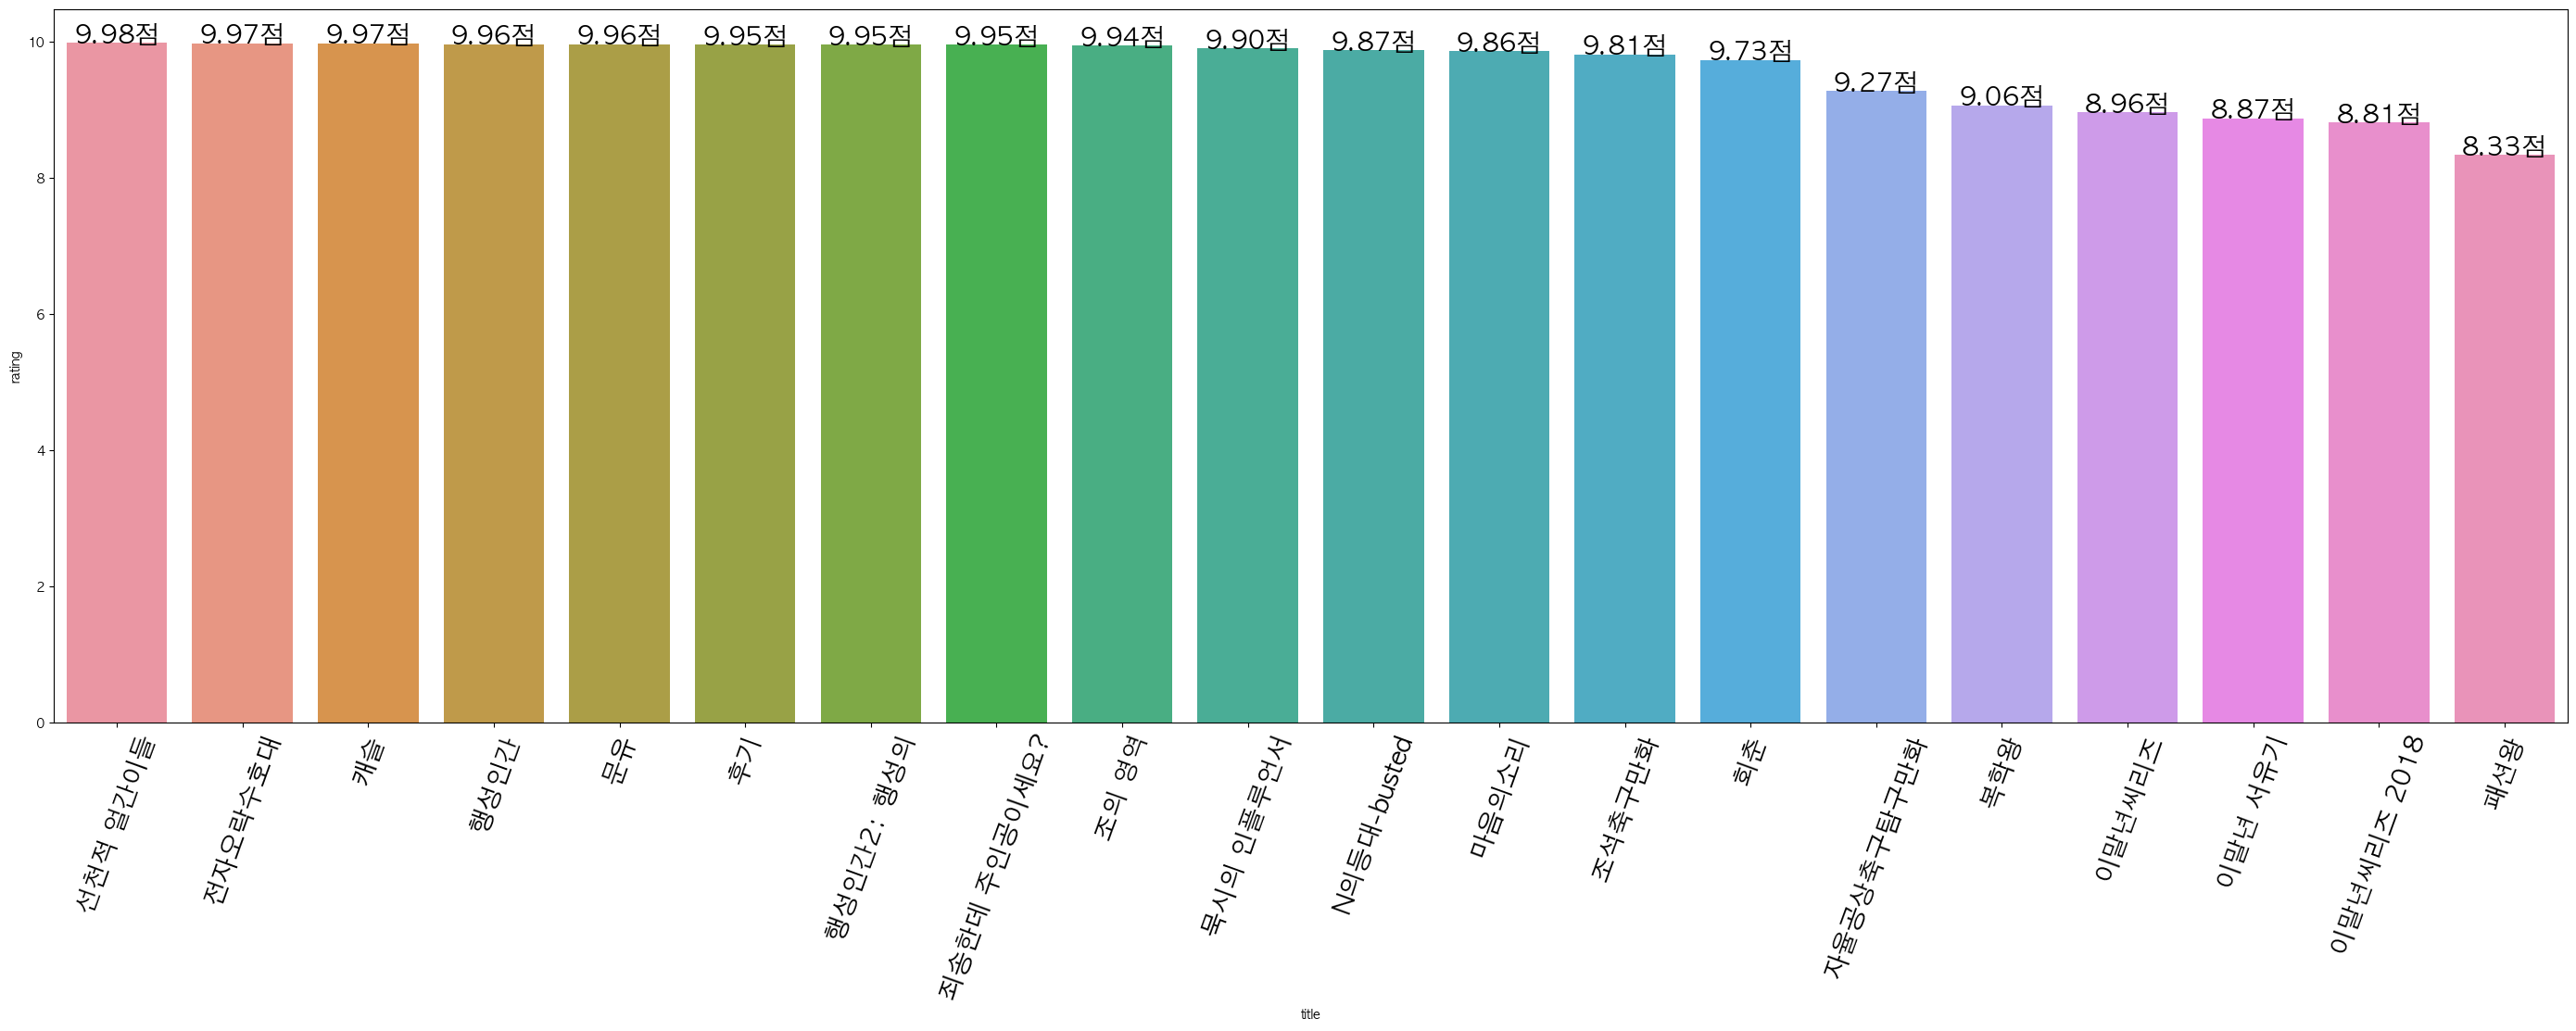

In [13]:
plt.figure(figsize=(35, 10))
My_author_bar = sns.barplot(data = df_My_author, x='title', y='rating')

for p in My_author_bar.patches:
    My_author_bar.text(p.get_x() + p.get_width()/2,
                       p.get_y() + p.get_height(),
                       f'{p.get_height():.2f}점',
                       ha='center',
                       fontsize=20
                      )

plt.xticks(rotation=70)
plt.xticks(fontsize=20)
plt.show()

좋아했던 웹툰을 그린 작가들의 다른 작품들 평점을 보았다.</br>

선척적 얼간이들 (가스파드) 9.98점</br>
캐슬 (정연) 9.97점</br>
마음의소리 (조석) 9.86점</br>
패션왕 (기안84) 8.33점</br>
이말년씨리즈 (이말년) 8.96점</br>

이 기억에 패션왕 점수가 낮은 이유는 잦은 지각, 갑자기 늑대가 나오는 스토리 등 점수가 낮아졌던걸로 기억함</br>
마음의 소리는 14년 동안의 연재기간 동안 9.86이라는 높은 평점을 유지했다.</br>